<h2>Assignment 1.1</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px

In [2]:
transactions = pd.read_csv('Comfy_Data/Transactions.csv', sep = ';') #transactions data
clients = pd.read_csv('Comfy_Data/Client_information.csv', sep = ';')

In [3]:
# Convert 'Sale_Return', 'Client_id', 'Credit', and 'SKU_id', 'Revenue', 'Quantity'  to numeric types
transactions['Revenue'] = pd.to_numeric(transactions['Revenue'], errors='coerce')
transactions['Quantity'] = pd.to_numeric(transactions['Quantity'], errors='coerce')
transactions['Sale_Return'] = pd.to_numeric(transactions['Sale_Return'], errors='coerce')
transactions['Client_id'] = pd.to_numeric(transactions['Client_id'], errors='coerce')
transactions['Credit'] = pd.to_numeric(transactions['Credit'], errors='coerce')
transactions['SKU_id'] = pd.to_numeric(transactions['SKU_id'], errors='coerce')

#Convert to date time 
transactions['Date'] = pd.to_datetime(transactions['Date'], errors='coerce')

In [4]:
print(transactions.dtypes)


City                    object
Date            datetime64[ns]
Receipt_id              object
Sale_Return              int64
Client_id                int64
Channel                 object
Platform                object
Credit                   int64
SKU_id                   int64
Business                object
Brand                   object
Category                object
Region                  object
Revenue                float64
Quantity               float64
City_On_Off             object
Category_Ukr            object
dtype: object


In [5]:
def count_blanks_and_hyphens(df):
    blank_counts = {}
    for column in df.columns:
        blank_count = (df[column].isna().sum()) + (df[column] == '').sum() + (df[column] == '-').sum()
        blank_counts[column] = blank_count
    return blank_counts

In [6]:
blank_frequencies = count_blanks_and_hyphens(transactions)
# Print the frequencies
for column, count in blank_frequencies.items():
    print(f"Column '{column}' has {count} blank or '-' values.")

Column 'City' has 0 blank or '-' values.
Column 'Date' has 0 blank or '-' values.
Column 'Receipt_id' has 0 blank or '-' values.
Column 'Sale_Return' has 0 blank or '-' values.
Column 'Client_id' has 0 blank or '-' values.
Column 'Channel' has 0 blank or '-' values.
Column 'Platform' has 123 blank or '-' values.
Column 'Credit' has 0 blank or '-' values.
Column 'SKU_id' has 0 blank or '-' values.
Column 'Business' has 0 blank or '-' values.
Column 'Brand' has 315080 blank or '-' values.
Column 'Category' has 0 blank or '-' values.
Column 'Region' has 0 blank or '-' values.
Column 'Revenue' has 24522 blank or '-' values.
Column 'Quantity' has 24522 blank or '-' values.
Column 'City_On_Off' has 0 blank or '-' values.
Column 'Category_Ukr' has 0 blank or '-' values.


In [7]:
duplicates = transactions[transactions['Receipt_id'].duplicated()]

# Print the result
if not duplicates.empty:
    print(f"Found {len(duplicates)} duplicate(s) in the 'Receipt_id' column")
    # print(duplicates)
else:
    print("No duplicates found in the 'Receipt_id' column.")

Found 1135569 duplicate(s) in the 'Receipt_id' column


Check for Client_Id Consistency 

In [8]:
missing_client_id = transactions[transactions['Client_id'].isna()]
# Print the result
if not missing_client_id.empty:
    print(f"Found {len(missing_client_id)} transaction(s) with missing 'Client_id'")
    # print(missing_client_id)
else:
    print("No transactions found with missing 'Client_id'.")


# Find Client_id values in transactions that are not in clients
different_client_ids = transactions[~transactions['Client_id'].isin(clients['Client_id'])]

if not different_client_ids.empty:
    print(f"Found {len(different_client_ids)} transaction(s) with 'Client_id' not present in the clients DataFrame:")
    print(different_client_ids[['Client_id']].drop_duplicates())  # Print unique Client_id values
else:
    print("All 'Client_id' values in transactions are present in the clients DataFrame.")

No transactions found with missing 'Client_id'.
All 'Client_id' values in transactions are present in the clients DataFrame.


Checking Retail and Platform Logic <br>

Found only 15 rows where 'Channel' is 'Retail' but 'Platform' is not null or '-'


In [9]:
unique_channels = transactions['Channel'].unique()
print("Unique values in the 'Channel' column ")
print(unique_channels)

unique_platforms = transactions['Platform'].unique()
print("Unique values in the 'Platform' column ")
print(unique_platforms)

Unique values in the 'Channel' column 
['Retail' 'Internet']
Unique values in the 'Platform' column 
[' ' 'web' 'app' '-']


In [20]:
# Filter rows where Channel is 'Retail' but Platform is not blank space or '-'
invalid_platforms = transactions[
    (transactions['Channel'] == 'Retail') & 
    (~transactions['Platform'].isin([' ', '-']))
]

if not invalid_platforms.empty:
    print(f"Found {len(invalid_platforms)} row(s) where 'Channel' is 'Retail' but 'Platform' is not blank space or '-':")
    print(invalid_platforms[['Channel', 'Platform']])
else:
    print("All rows with 'Channel' as 'Retail' have 'Platform' as blank space or '-'.")

Found 15 row(s) where 'Channel' is 'Retail' but 'Platform' is not blank space or '-':
        Channel Platform
60307    Retail      web
60308    Retail      web
60309    Retail      web
235929   Retail      web
278142   Retail      app
278143   Retail      app
278145   Retail      app
278146   Retail      app
534998   Retail      web
1912490  Retail      web
1912492  Retail      web
1912495  Retail      web
2500746  Retail      web
2500760  Retail      web
2500762  Retail      web


Check for missing SKU_id to check for invalid transaction possibility <br>
Result - None Found

In [11]:
missing_sku = transactions[transactions['SKU_id'].isna()]

if not missing_sku.empty:
    print(f"Found {len(missing_sku)} transaction(s) with missing 'SKU_id'")
    # print(missing_sku)
else:   
    print("No transactions found with missing 'SKU_id'.")


No transactions found with missing 'SKU_id'.


Check consistency for Negative or 0 Revenue transactions in dataset

In [12]:
# Filter rows where Revenue is negative or zero
invalid_revenue = transactions[transactions['Revenue'] <= 0]

# Print the result
if not invalid_revenue.empty:
    print(f"Found {len(invalid_revenue)} row(s) with negative or zero 'Revenue':")
    print(invalid_revenue[['Revenue']])
else:
    print("No rows found with negative or zero 'Revenue'.")

Found 85591 row(s) with negative or zero 'Revenue':
         Revenue
10        -599.0
78       -3099.0
86           0.0
137          0.0
147          0.0
...          ...
2679307  -3398.0
2679309     -1.0
2679310   -270.0
2679891  -2849.0
2679894    -55.0

[85591 rows x 1 columns]


In [13]:
# Filter rows where Revenue is negative but Sale_Return is not 0
inconsistent_rows = transactions[(transactions['Revenue'] < 0) & (transactions['Sale_Return'] != 0)]

# Print the result
if not inconsistent_rows.empty:
    print(f"Found {len(inconsistent_rows)} inconsistent row(s) where 'Revenue' is negative but 'Sale_Return' is not 0:")
    print(inconsistent_rows[['Revenue', 'Sale_Return']])
else:
    print("No inconsistencies found where 'Revenue' is negative but 'Sale_Return' is not 0.")

No inconsistencies found where 'Revenue' is negative but 'Sale_Return' is not 0.


Measures for variables

Found 412734 outlier(s) in 'Revenue' using IQR method.

Outlier Statistics:
Minimum outlier value: -288000.0
Median outlier value: 13899.0
Maximum outlier value: 539909999.0
Outlier interval: (-288000.0, 539909999.0)
Percentage of outliers: 15.40%

Found 51166 transaction(s) with negative Revenue.


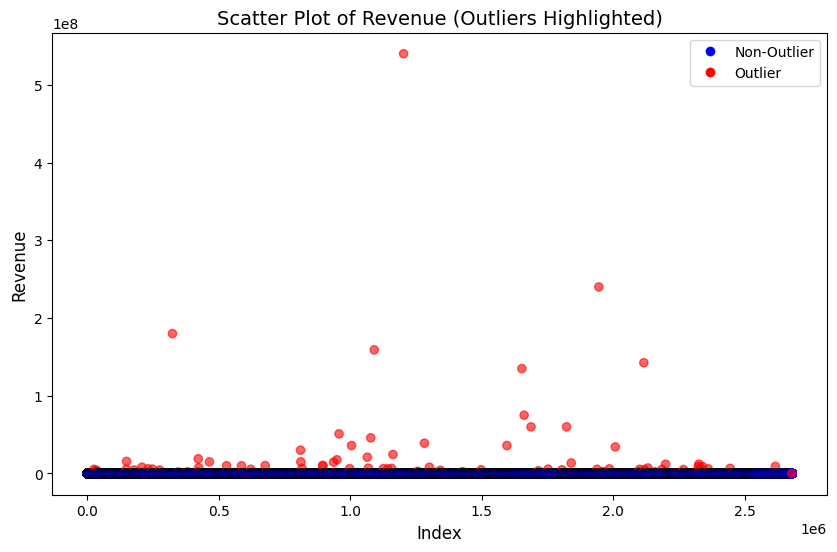

In [19]:
# --- Calculate IQR based outlier boundaries for Revenue ---
Q1 = transactions['Revenue'].quantile(0.25)
Q3 = transactions['Revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# --- Filter out rows with extreme Revenue values ---
outliers_iqr = transactions[(transactions['Revenue'] < lower_bound) | (transactions['Revenue'] > upper_bound)]

# Print basic outlier count information
if not outliers_iqr.empty:
    print(f"Found {len(outliers_iqr)} outlier(s) in 'Revenue' using IQR method.")
else:
    print("No outliers found in 'Revenue' using IQR method.")

# --- Add a column to mark outliers in transactions ---
transactions['Is_Outlier'] = (transactions['Revenue'] < lower_bound) | (transactions['Revenue'] > upper_bound)

# --- Calculate additional statistics for outliers ---
if not outliers_iqr.empty:
    outliers_min = outliers_iqr['Revenue'].min()
    outliers_median = outliers_iqr['Revenue'].median()
    outliers_max = outliers_iqr['Revenue'].max()
    outliers_interval = (outliers_min, outliers_max)
    pct_outliers = (len(outliers_iqr) / len(transactions)) * 100

    print("\nOutlier Statistics:")
    print(f"Minimum outlier value: {outliers_min}")
    print(f"Median outlier value: {outliers_median}")
    print(f"Maximum outlier value: {outliers_max}")
    print(f"Outlier interval: {outliers_interval}")
    print(f"Percentage of outliers: {pct_outliers:.2f}%")
else:
    print("No outlier statistics to display.")

# --- Calculate number of negative Revenue values (if applicable) ---
negative_revenue = transactions[transactions['Revenue'] < 0]
num_negative = len(negative_revenue)
if num_negative > 0:
    print(f"\nFound {num_negative} transaction(s) with negative Revenue.")
else:
    print("\nNo negative Revenue values found.")

# --- Create a scatter plot to visualize Revenue and mark outliers ---
plt.figure(figsize=(10, 6))
# Color code: red for outliers, blue for non-outliers
plt.scatter(transactions.index, transactions['Revenue'], 
            c=transactions['Is_Outlier'].map({True: 'red', False: 'blue'}), 
            alpha=0.6)

plt.title('Scatter Plot of Revenue (Outliers Highlighted)', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Create custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Non-Outlier', markerfacecolor='blue', markersize=8),
                   Line2D([0], [0], marker='o', color='w', label='Outlier', markerfacecolor='red', markersize=8)]
plt.legend(handles=legend_elements, loc='upper right')

plt.show()

Checking for inconsistency in Quantity Column

In [22]:
invalid_quantity = transactions[transactions['Quantity'] <= 0]

if not invalid_quantity.empty:
    print(f"Found {len(invalid_quantity)} row(s) with negative or zero 'Quantity':")
    print(invalid_quantity[['Quantity']])
else:
    print("No rows found with negative or zero 'Quantity'.")

Found 54672 row(s) with negative or zero 'Quantity':
         Quantity
10           -1.0
78           -1.0
86            0.0
147           0.0
148           0.0
...           ...
2679307      -1.0
2679309      -1.0
2679310      -1.0
2679891      -1.0
2679894      -1.0

[54672 rows x 1 columns]


In [23]:
# Filter rows where Quantity is less than 0 but Sale_Return is not 0
invalid_quantity_sale_return = transactions[(transactions['Quantity'] < 0) & (transactions['Sale_Return'] != 0)]

if not invalid_quantity_sale_return.empty:
    print(f"Found {len(invalid_quantity_sale_return)} inconsistent row(s) where 'Quantity' is less than 0 but 'Sale_Return' is not 0:")
    print(invalid_quantity_sale_return[['Quantity', 'Sale_Return']])
else:
    print("No inconsistencies found where 'Quantity' is less than 0 but 'Sale_Return' is not 0.")

No inconsistencies found where 'Quantity' is less than 0 but 'Sale_Return' is not 0.


Clients Dataset

In [17]:
# Convert 'Registration_date' to datetime
clients['Registration_date'] = pd.to_datetime(clients['Registration_date'], errors='coerce')
#convert Number_of_receipts to numeric
clients['Number_of_receipts'] = pd.to_numeric(clients['Number_of_receipts'], errors='coerce')
#CONVERT Total_revenue TO NUMERIC
clients['Total_revenue'] = pd.to_numeric(clients['Total_revenue'], errors='coerce')
#CONVERT AGE TO NUMERIC
clients['Age'] = pd.to_numeric(clients['Age'], errors='coerce')

print(clients.dtypes)       

Client_id                      int64
Registration_date     datetime64[ns]
Gender                        object
Age                          float64
Number_of_receipts             int64
Total_revenue                  int64
dtype: object


In [18]:
#check that Total_revenue is not negative
invalid_total_revenue = clients[clients['Total_revenue'] < 0]

if not invalid_total_revenue.empty:
    print(f"Found {len(invalid_total_revenue)} row(s) with negative 'Total_revenue':")
    print(invalid_total_revenue[['Total_revenue']])
else:
    print("No rows found with negative 'Total_revenue'.")

No rows found with negative 'Total_revenue'.
